# Now its time for making Pipeline and Model 🚀

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import FeatureHasher 
from sklearn import set_config
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

import pandas as pd

### Reading the dataset


In [2]:
dataset_for_training = pd.read_csv("Dataset_for_training.csv")

In [3]:
dataset_for_training.columns

Index(['Unnamed: 0', 'Car_Name', 'Brand_Name', 'Engine Capacity', 'Category',
       'Body Consition', 'model Year', 'Milage', 'Fuel Type', 'Transmission',
       'Color', 'City Registered', 'Price'],
      dtype='object')

In [4]:
dataset_for_training.head()

,Unnamed: 0,Car_Name,Brand_Name,Engine Capacity,Category,Body Consition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price
0,0,Alsvin,Changan,1500,Sedan,Excellent,2022,46000,Petrol,Automatic,Steller White,Punjab,39.00
1,1,Yaris,Toyota,1000,Sedan,Excellent,2020,100000,Petrol,Automatic,Silver,Un-Registered,45.75
2,2,Alsvin,Changan,1500,Sedan,Excellent,2023,14717,Petrol,Automatic,Lunar Silver,Islamabad,42.50
3,3,Alsvin,Changan,1500,Sedan,Excellent,2022,40737,Petrol,Automatic,Steller White,Islamabad,31.00
4,4,Alsvin,Changan,1500,Sedan,Excellent,2021,59155,Petrol,Automatic,Steller White,Karachi,35.00


In [5]:
# dropping the unwanted column
dataset_for_training.drop(columns=['Unnamed: 0'] , axis=1,inplace=True)

In [6]:
dataset_for_training.head()

,Car_Name,Brand_Name,Engine Capacity,Category,Body Consition,model Year,Milage,Fuel Type,Transmission,Color,City Registered,Price
0,Alsvin,Changan,1500,Sedan,Excellent,2022,46000,Petrol,Automatic,Steller White,Punjab,39.00
1,Yaris,Toyota,1000,Sedan,Excellent,2020,100000,Petrol,Automatic,Silver,Un-Registered,45.75
2,Alsvin,Changan,1500,Sedan,Excellent,2023,14717,Petrol,Automatic,Lunar Silver,Islamabad,42.50
3,Alsvin,Changan,1500,Sedan,Excellent,2022,40737,Petrol,Automatic,Steller White,Islamabad,31.00
4,Alsvin,Changan,1500,Sedan,Excellent,2021,59155,Petrol,Automatic,Steller White,Karachi,35.00


In [7]:
dataset_for_training.columns

Index(['Car_Name', 'Brand_Name', 'Engine Capacity', 'Category',
       'Body Consition', 'model Year', 'Milage', 'Fuel Type', 'Transmission',
       'Color', 'City Registered', 'Price'],
      dtype='object')

In [8]:
dataset_for_training = dataset_for_training[['model Year','Milage','City Registered','Color','Engine Capacity','Brand_Name','Car_Name','Transmission','Fuel Type','Body Consition','Category','Price']]

<Axes: xlabel='Brand_Name'>

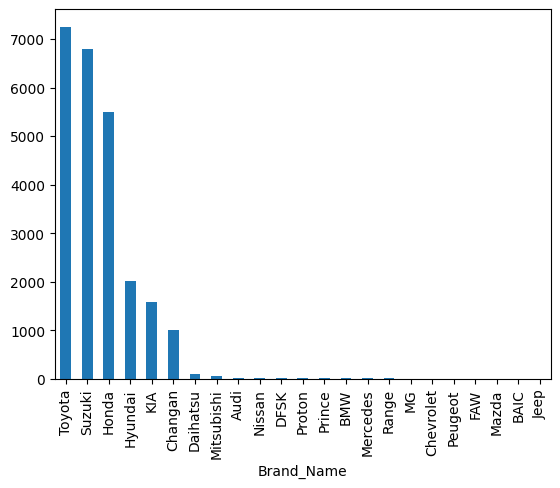

In [9]:
dataset_for_training.Brand_Name.value_counts().nlargest(30).plot(kind='bar')

### Convert all data to lowercase 
for better understanding 

In [10]:
lower_case_string = lambda x : x.lower() if isinstance(x,str) else x
dataset_for_training = dataset_for_training.map(lower_case_string)

In [11]:
dataset_for_training.head()

,model Year,Milage,City Registered,Color,Engine Capacity,Brand_Name,Car_Name,Transmission,Fuel Type,Body Consition,Category,Price
0,2022,46000,punjab,steller white,1500,changan,alsvin,automatic,petrol,excellent,sedan,39.00
1,2020,100000,un-registered,silver,1000,toyota,yaris,automatic,petrol,excellent,sedan,45.75
2,2023,14717,islamabad,lunar silver,1500,changan,alsvin,automatic,petrol,excellent,sedan,42.50
3,2022,40737,islamabad,steller white,1500,changan,alsvin,automatic,petrol,excellent,sedan,31.00
4,2021,59155,karachi,steller white,1500,changan,alsvin,automatic,petrol,excellent,sedan,35.00


## Spliting The Data

In [12]:
dataset_for_training.dtypes

model Year           int64
Milage               int64
City Registered     object
Color               object
Engine Capacity      int64
Brand_Name          object
Car_Name            object
Transmission        object
Fuel Type           object
Body Consition      object
Category            object
Price              float64
dtype: object

In [13]:
print('Total Data is -->',dataset_for_training.shape[0])

Total Data is --> 24398


In [14]:
x_train,x_test , y_train,y_test = train_test_split(dataset_for_training.drop(columns=['Price'],axis= 1), dataset_for_training['Price'], test_size=0.3,random_state=12)

In [15]:
print(f'Shape of Training Data -->\n Training Data --> {x_train.shape[0]}\n Training Label --> {y_train.shape[0]}')

Shape of Training Data -->
 Training Data --> 17078
 Training Label --> 17078


In [16]:
print(f'Shape of Testing Data -->\n Test Data --> {x_test.shape[0]}\n Test Label --> {y_test.shape[0]}')

Shape of Testing Data -->
 Test Data --> 7320
 Test Label --> 7320


## Trying Linear Regression

In [17]:
# transformer

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = LinearRegression()

In [18]:
# Defining the pipeline
liner_pip_line = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])

In [19]:
y_predict = liner_pip_line.fit(x_train,y_train)

In [20]:
linear_predict = liner_pip_line.predict(x_test)
linear_predict

array([ 12.67297996,  31.42186188,  77.93074973, ...,  53.24875071,
        53.17370878, -28.7524471 ])

In [21]:
print("----------- Evaluation Matrices of Linear Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,linear_predict))
print("MSE = ",mean_squared_error(y_test,linear_predict))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,linear_predict)))
print('r2 Score = ',r2_score(y_test,linear_predict))


----------- Evaluation Matrices of Linear Regression Model ---------
MAE =  10.741350916435389
MSE =  244.02499979531953
RMSE =  15.621299555264905
r2 Score =  0.8527216834347915


Giving custom data to the model

In [22]:
p = liner_pip_line.predict([[2021,46000,'punjab','steller white'
                               ,1500,'changan','alsvin','manual','petrol',
                               'good','sedan']])

print(f"Linear Regression Custom Price is {p[0]} lacs")


Linear Regression Custom Price is 40.82992801050843 lacs


c:\Users\M_ros\anaconda3\envs\fyp2\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


## Decision Tree Regression Pipeline

In [23]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Decision Tree Regression
m_lr = DecisionTreeRegressor()

decision_tree_pipline = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])

In [24]:
decision_tree_pipline.fit(x_train,y_train)

Pipeline(steps=[('One Hot Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [7, 8])])),
                ('Ordinal Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordianl Encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  [5, 6, 7, 8, 9, 10])])),
                ('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Linear Regression', DecisionTreeRegressor())])

In [25]:
decision_predict = decision_tree_pipline.predict(x_test)
decision_predict


array([10.  , 18.  , 86.45, ..., 41.  , 51.5 ,  3.7 ])

In [26]:
print("----------- Evaluation Matrices of Decision Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,decision_predict))
print("MSE = ",mean_squared_error(y_test,decision_predict))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,decision_predict)))
print('r2 Score = ',r2_score(y_test,decision_predict))

----------- Evaluation Matrices of Decision Regression Model ---------
MAE =  1.17309238575632
MSE =  13.068631132194144
RMSE =  3.6150561727577823
r2 Score =  0.9921125868473492


In [27]:
p = decision_tree_pipline.predict([[2021,13000,'punjab','steller white'
                               ,1500,'changan','alsvin','manual','petrol',
                               'good','sedan']])

print(f"Decision Tree Regression Custom Price is {p[0]} lacs")


Decision Tree Regression Custom Price is 41.0 lacs


c:\Users\M_ros\anaconda3\envs\fyp2\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [28]:
p = decision_tree_pipline.predict([[2022,29354,'punjab','black'
                               ,2800,'toyota','fortuner','automatic','diesel',
                               'excellent','suv']])

print(f"Decision Tree Regression Custom Price is {p[0]} lacs")


Decision Tree Regression Custom Price is 156.0 lacs


c:\Users\M_ros\anaconda3\envs\fyp2\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


## Trying XgBoost

In [29]:
from xgboost import XGBRegressor

In [30]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = XGBRegressor()


In [31]:
xg_boost_pip = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])

In [32]:
xg_boost_pip.fit(x_train,y_train)


Pipeline(steps=[('One Hot Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [7, 8])])),
                ('Ordinal Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordianl Encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  [5, 6, 7, 8, 9, 10])])),
                ('Nan Imput...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [33]:
xg_p = xg_boost_pip.predict(x_test)
xg_p

array([10.160114, 18.312943, 85.60637 , ..., 40.103806, 54.97229 ,
        4.760776], dtype=float32)

In [34]:
print("----------- Evaluation Matrices of XgBoost Model ---------")
print("MAE = ",mean_absolute_error(y_test,xg_p))
print("MSE = ",mean_squared_error(y_test,xg_p))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,xg_p)))
print('r2 Score = ',r2_score(y_test,xg_p))


----------- Evaluation Matrices of XgBoost Model ---------
MAE =  2.5664701304083968
MSE =  19.312522041900486
RMSE =  4.394601465650837
r2 Score =  0.9883441625352103


## Random Forest Regression

In [35]:
# Transformers

tf1_lr = ColumnTransformer([('OHE',OneHotEncoder(drop = 'first', handle_unknown='ignore'),[7,8])],remainder = 'passthrough')
tf2_lr = ColumnTransformer([('Ordianl Encoding',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),[5,6,7,8,9,10])],remainder='passthrough')
tf3_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf4_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])

# Model Linear Regression
m_lr = RandomForestRegressor()

# Defining the pipeline
randome_pipe = Pipeline([
    ('One Hot Encoder',tf1_lr),
    ('Ordinal Encoding',tf2_lr),
    ('Nan Imputer',tf3_lr),
    ('StandardScaler',tf4_lr),
    ('Linear Regression',m_lr)])


# fitting the pipeline with the training data
randome_pipe.fit(x_train,y_train)

Pipeline(steps=[('One Hot Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [7, 8])])),
                ('Ordinal Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordianl Encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  [5, 6, 7, 8, 9, 10])])),
                ('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Linear Regression', RandomForestRegressor())])

In [36]:
ran_p =randome_pipe.predict(x_test)

In [37]:
print("----------- Evaluation Matrices of XgBoost Model ---------")
print("MAE = ",mean_absolute_error(y_test,ran_p))
print("MSE = ",mean_squared_error(y_test,ran_p))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,ran_p)))
print('r2 Score = ',r2_score(y_test,ran_p))


----------- Evaluation Matrices of XgBoost Model ---------
MAE =  1.4035179884610476
MSE =  12.944992280725591
RMSE =  3.5979149907586185
r2 Score =  0.9921872075703144


### Evaluation Metrices for all the models

In [38]:
print("----------- Evaluation Matrices of Linear Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,linear_predict))
print("MSE = ",mean_squared_error(y_test,linear_predict))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,linear_predict)))
print('r2 Score = ',r2_score(y_test,linear_predict))


print("----------- Evaluation Matrices of Decision Regression Model ---------")
print("MAE = ",mean_absolute_error(y_test,decision_predict))
print("MSE = ",mean_squared_error(y_test,decision_predict))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,decision_predict)))
print('r2 Score = ',r2_score(y_test,decision_predict))

print("----------- Evaluation Matrices of XgBoost Model ---------")
print("MAE = ",mean_absolute_error(y_test,xg_p))
print("MSE = ",mean_squared_error(y_test,xg_p))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,xg_p)))
print('r2 Score = ',r2_score(y_test,xg_p))

print("----------- Evaluation Matrices of XgBoost Model ---------")
print("MAE = ",mean_absolute_error(y_test,ran_p))
print("MSE = ",mean_squared_error(y_test,ran_p))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,ran_p)))
print('r2 Score = ',r2_score(y_test,ran_p))



----------- Evaluation Matrices of Linear Regression Model ---------
MAE =  10.741350916435389
MSE =  244.02499979531953
RMSE =  15.621299555264905
r2 Score =  0.8527216834347915
----------- Evaluation Matrices of Decision Regression Model ---------
MAE =  1.17309238575632
MSE =  13.068631132194144
RMSE =  3.6150561727577823
r2 Score =  0.9921125868473492
----------- Evaluation Matrices of XgBoost Model ---------
MAE =  2.5664701304083968
MSE =  19.312522041900486
RMSE =  4.394601465650837
r2 Score =  0.9883441625352103
----------- Evaluation Matrices of XgBoost Model ---------
MAE =  1.4035179884610476
MSE =  12.944992280725591
RMSE =  3.5979149907586185
r2 Score =  0.9921872075703144


#### Choosing the best model

MAE (Mean Absolute Error): Lower values indicate better performance in terms of average absolute errors. <br>
MSE (Mean Squared Error): Lower values indicate better performance in terms of average squared errors.<br>
RMSE (Root Mean Squared Error): Lower values indicate better performance in terms of root mean squared errors. <br>
R-squared (r2) Score: Higher values (closer to 1) indicate better fit of the model to the data.<br>

According to the above evaluations <br>
Decision Regression Model has the lowest MAE, MSE, RMSE, and highest r2 Score among all the models, indicating that it performs the best overall in terms of accuracy and predictive power.<br>
XGBoost Model 2 also performs very well, with slightly higher MAE, MSE, and RMSE compared to the Decision Regression Model but still having a very high r2 Score

<h4>So I am chossing the model with "Decision Tree Regression"</h4>

### Saving the model with Decision Tree Regreesion

In [39]:
import pickle

# Save the pipeline using pickle
with open('Price_prediction_decision_tree.pkl', 'wb') as file:
    pickle.dump(decision_tree_pipline, file)


In [40]:
## to load the model
with open('Price_prediction_decision_tree.pkl', 'rb') as file:
    loaded_pipe_lr = pickle.load(file)

Testing the model

model Year	Milage	City Registered	Color	Engine Capacity	Brand_Name	Car_Name	Transmission	Fuel Type	Body Consition	Category	Price
0	2022	46000	punjab	steller white	1500	changan	alsvin	automatic	petrol	excellent	sedan	39.00

In [42]:
loaded_pipe_lr.predict([[2012,146000 , 'multan','green',1300,'suzuki','swift','manual','petrol','fair','hatchback']])

c:\Users\M_ros\anaconda3\envs\fyp2\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([17.])